<a href="https://colab.research.google.com/github/jihun0423/Baseball-pitcher-predict/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA

In [ ]:
df.describe()

,p_k_percent,p_bb_percent,xwoba,z_swing_percent,z_swing_miss_percent,oz_swing_percent,oz_swing_miss_percent,oz_contact_percent,out_zone_percent,iz_contact_percent,...,fastball_avg_speed,fastball_avg_spin,fastball_avg_break,breaking_avg_speed,breaking_avg_spin,breaking_avg_break,offspeed_avg_speed,offspeed_avg_spin,offspeed_avg_break,Unnamed: 26
count,4197.000000,4197.000000,4197.000000,4197.000000,4197.000000,4197.000000,4197.000000,4197.000000,4197.000000,4197.000000,...,4197.000000,4197.000000,4197.000000,4197.000000,4197.000000,4197.000000,4197.000000,4197.000000,4197.000000,4197.0
mean,22.287467,9.115773,0.318886,67.132404,17.732571,27.879890,41.589540,57.779724,51.658828,81.706457,...,92.782059,2241.752204,17.446462,81.473767,2388.817489,10.176293,73.814987,1499.644031,13.691089,0.0
std,6.226018,3.294533,0.042526,4.351006,4.778360,4.115753,9.399938,9.354884,3.582967,4.742300,...,2.704614,157.904095,2.530262,8.337672,332.999057,4.422577,29.294906,646.030211,6.040067,0.0
min,4.000000,0.000000,0.154000,46.400000,2.700000,12.100000,14.300000,13.600000,38.900000,59.600000,...,80.300000,1593.000000,5.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,18.000000,6.800000,0.291000,64.400000,14.400000,25.300000,35.300000,51.700000,49.200000,78.800000,...,91.200000,2135.000000,16.000000,79.700000,2239.000000,6.800000,82.000000,1454.000000,12.700000,0.0
50%,21.700000,8.700000,0.317000,67.300000,17.400000,27.800000,41.100000,58.200000,51.500000,82.000000,...,92.900000,2243.000000,17.900000,82.400000,2399.000000,9.500000,85.000000,1680.000000,15.600000,0.0
75%,26.100000,11.000000,0.345000,70.000000,20.700000,30.500000,47.700000,64.000000,54.000000,85.000000,...,94.600000,2352.000000,19.200000,84.900000,2567.000000,13.300000,87.200000,1878.000000,17.500000,0.0
max,53.000000,32.100000,0.551000,81.800000,40.000000,46.600000,86.400000,85.700000,69.700000,97.300000,...,101.100000,2889.000000,25.300000,92.700000,3295.000000,23.600000,96.400000,2852.000000,26.600000,0.0


## 피처들의 분포

array([[<Axes: title={'center': 'p_k_percent'}>,
        <Axes: title={'center': 'p_bb_percent'}>,
        <Axes: title={'center': 'xwoba'}>,
        <Axes: title={'center': 'z_swing_percent'}>,
        <Axes: title={'center': 'z_swing_miss_percent'}>],
       [<Axes: title={'center': 'oz_swing_percent'}>,
        <Axes: title={'center': 'oz_swing_miss_percent'}>,
        <Axes: title={'center': 'oz_contact_percent'}>,
        <Axes: title={'center': 'out_zone_percent'}>,
        <Axes: title={'center': 'iz_contact_percent'}>],
       [<Axes: title={'center': 'in_zone_percent'}>,
        <Axes: title={'center': 'edge_percent'}>,
        <Axes: title={'center': 'whiff_percent'}>,
        <Axes: title={'center': 'fastball_avg_speed'}>,
        <Axes: title={'center': 'fastball_avg_spin'}>],
       [<Axes: title={'center': 'fastball_avg_break'}>,
        <Axes: title={'center': 'breaking_avg_speed'}>,
        <Axes: title={'center': 'breaking_avg_spin'}>,
        <Axes: title={'center': '

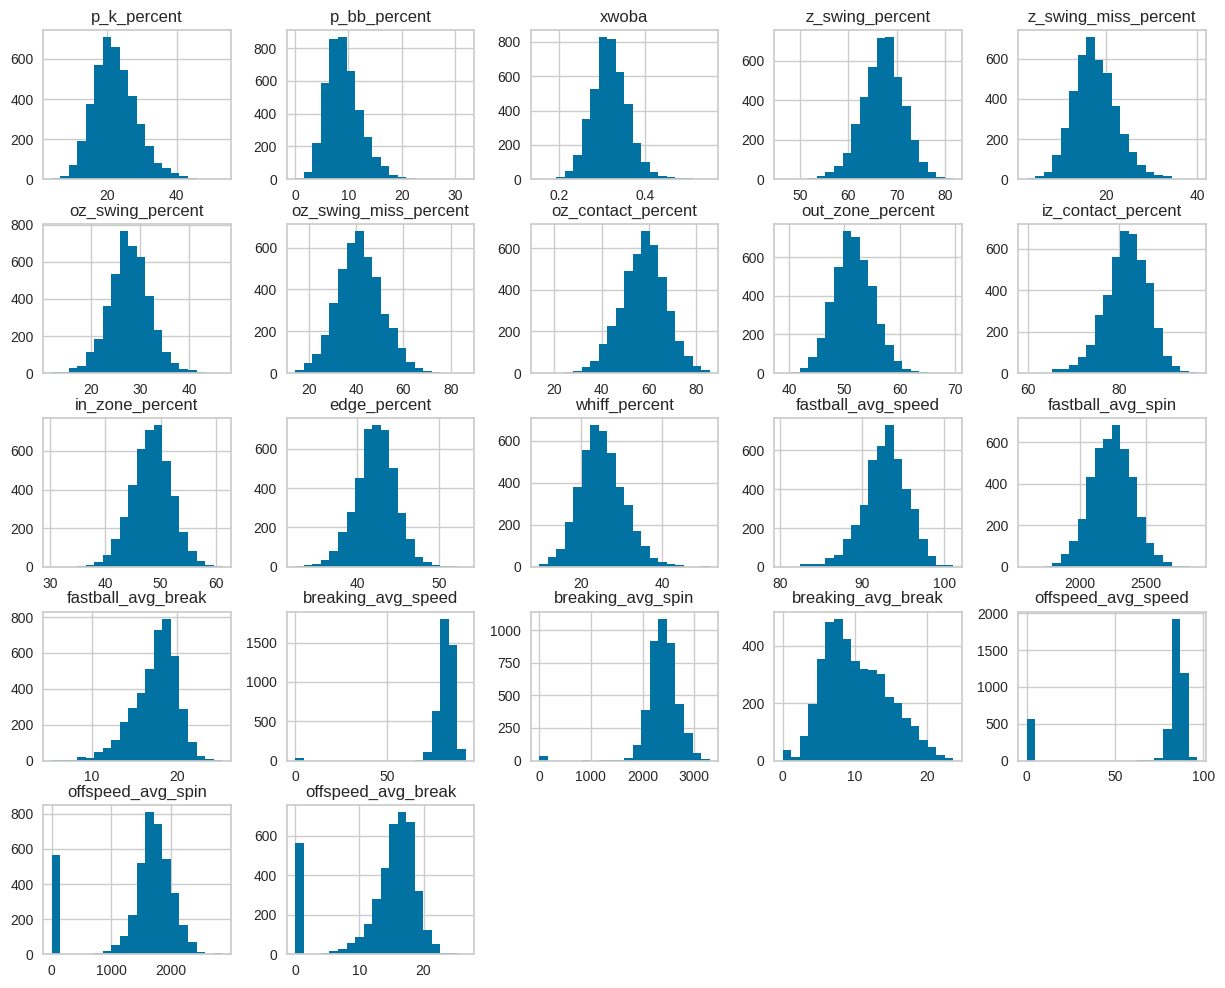

In [ ]:
df.hist(bins=20,figsize=(15,12))

breaking ball과 offspeed와 관련된 피쳐들은 일부 0으로 대체하였고, 이들을 제외하고는 정규분포에 가까운 분포를 보인다.

## 투수가 던진 공과 성적간의 관계 시각화

In [ ]:
pitch_features = ['fastball_avg_speed','fastball_avg_spin', 'fastball_avg_break', 'breaking_avg_speed','breaking_avg_spin', 'breaking_avg_break', 'offspeed_avg_speed','offspeed_avg_spin', 'offspeed_avg_break']
# 시각화를 위해 투수가 던진 공에 관련된 피쳐들만 추출하였다.

통상적인 생각으로는, 투수가 던지는 공의 구속이 빠를수록, 성적이 더 좋을 것이라고 예상한다. 공이 빠를수록 타자가 반응할 수 있는 시간이 짧아서, 그만큼 배트에 덜 맞을 확률이 높기 때문이다. 실제로 그런지 확인해보았다.

In [ ]:
def regplot(col):
  fig = plt.subplots(figsize=(18,5))
  plt.title(f'{col} vs xwoba',fontsize=15)
  sns.regplot(x = col, y = 'xwoba', data = df[df[col]!=0])

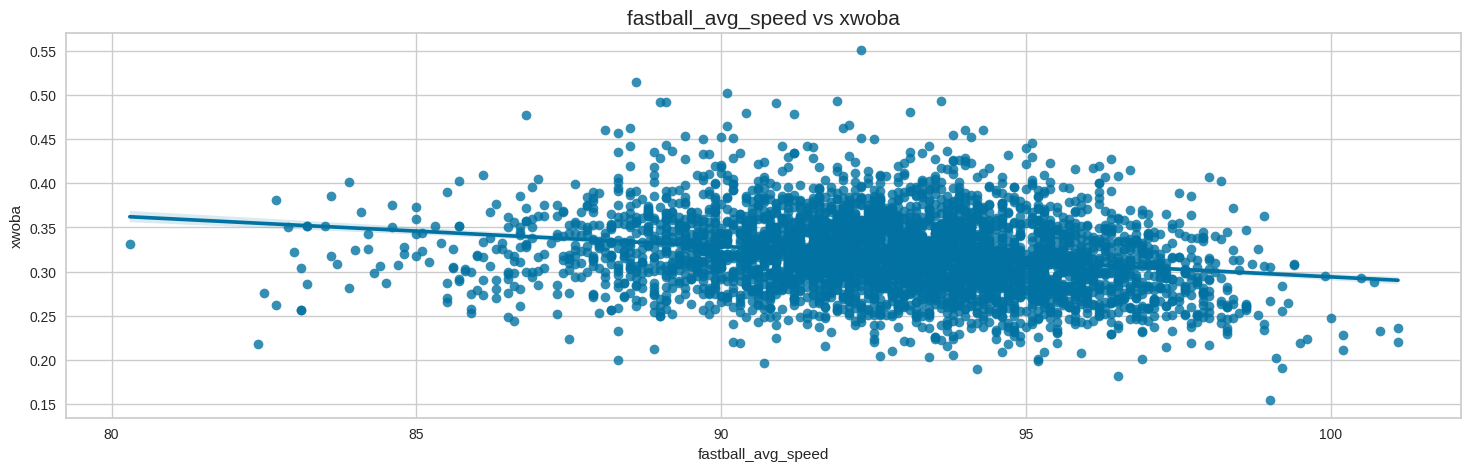

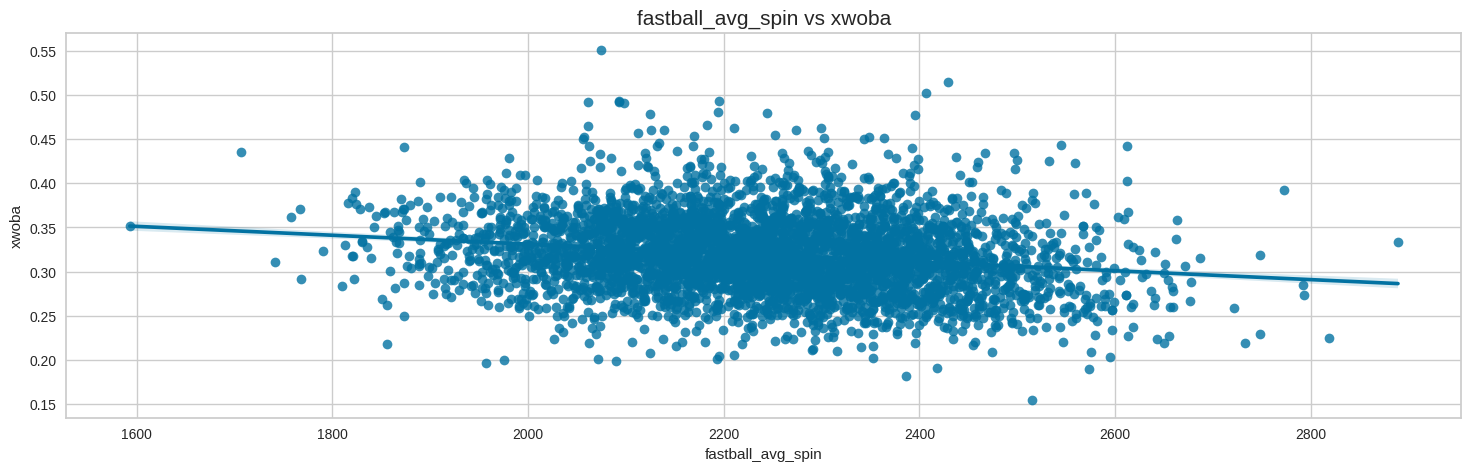

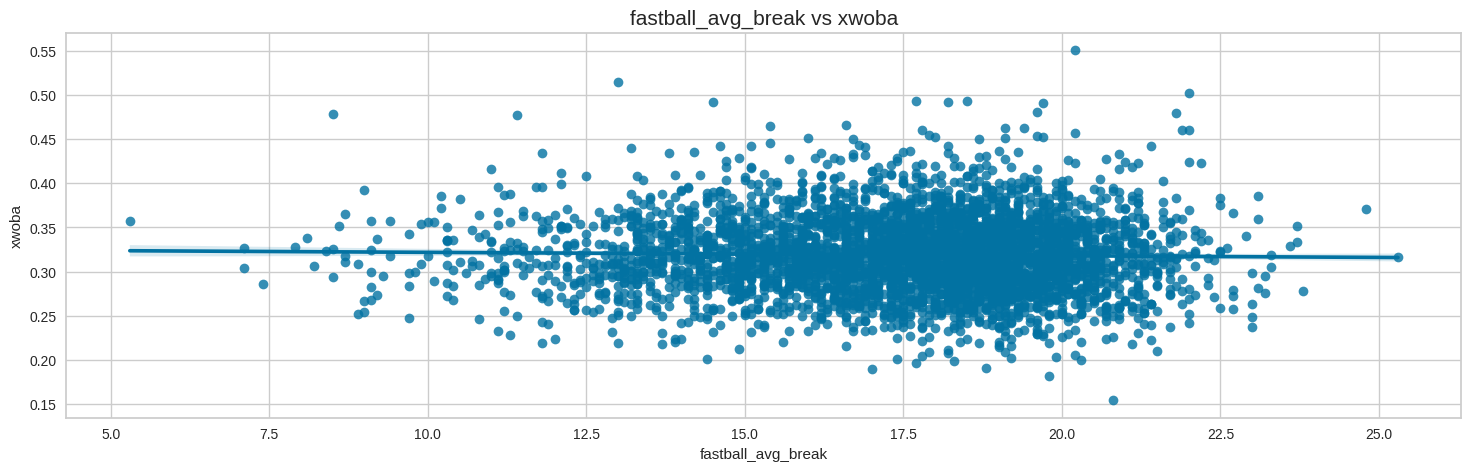

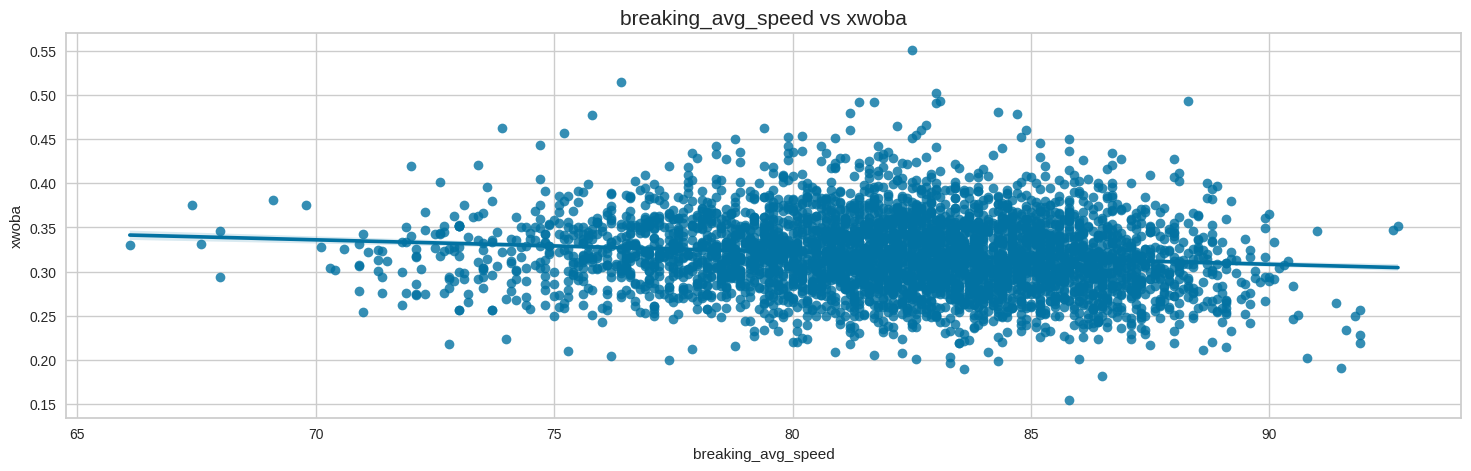

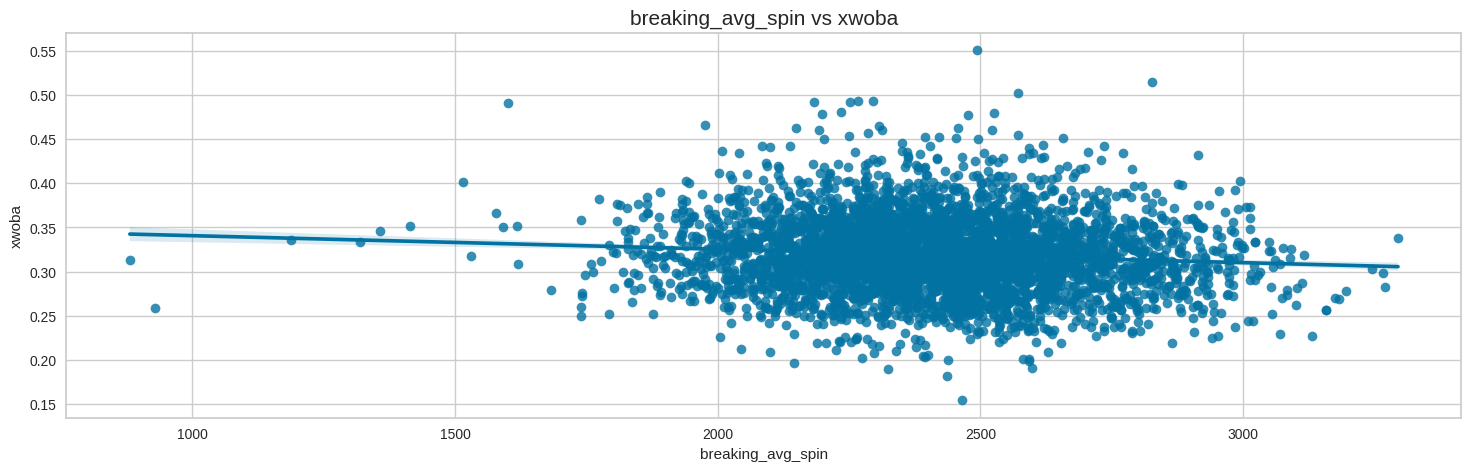

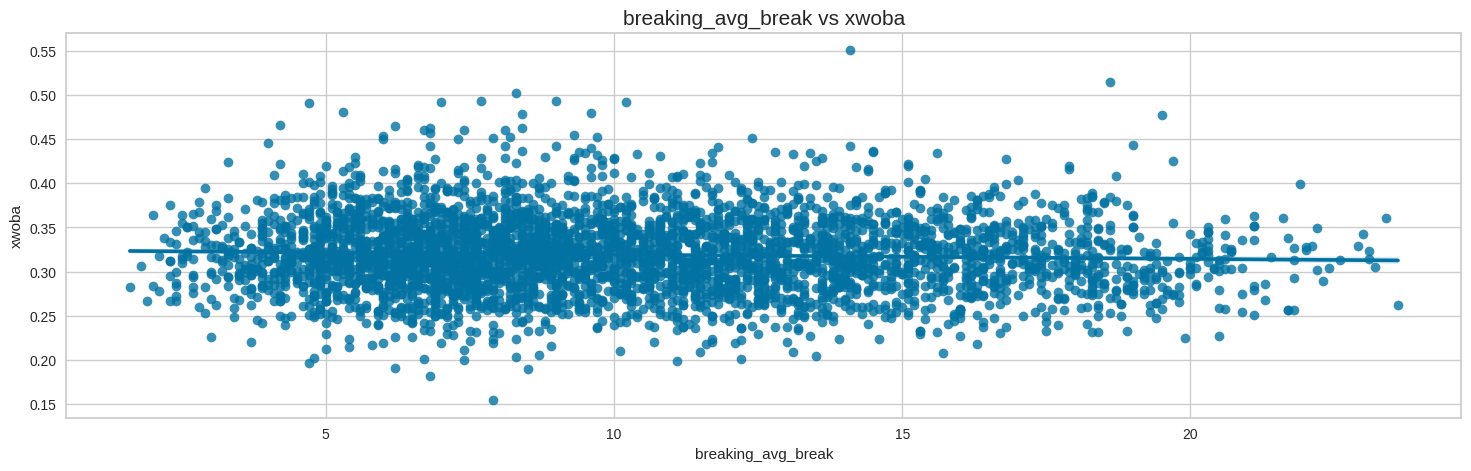

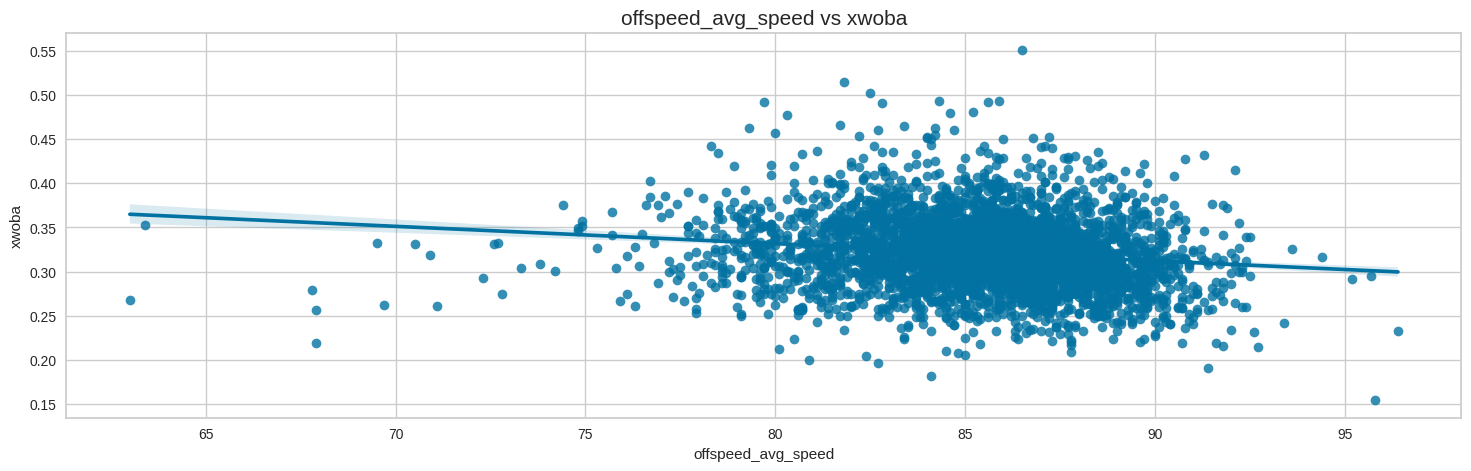

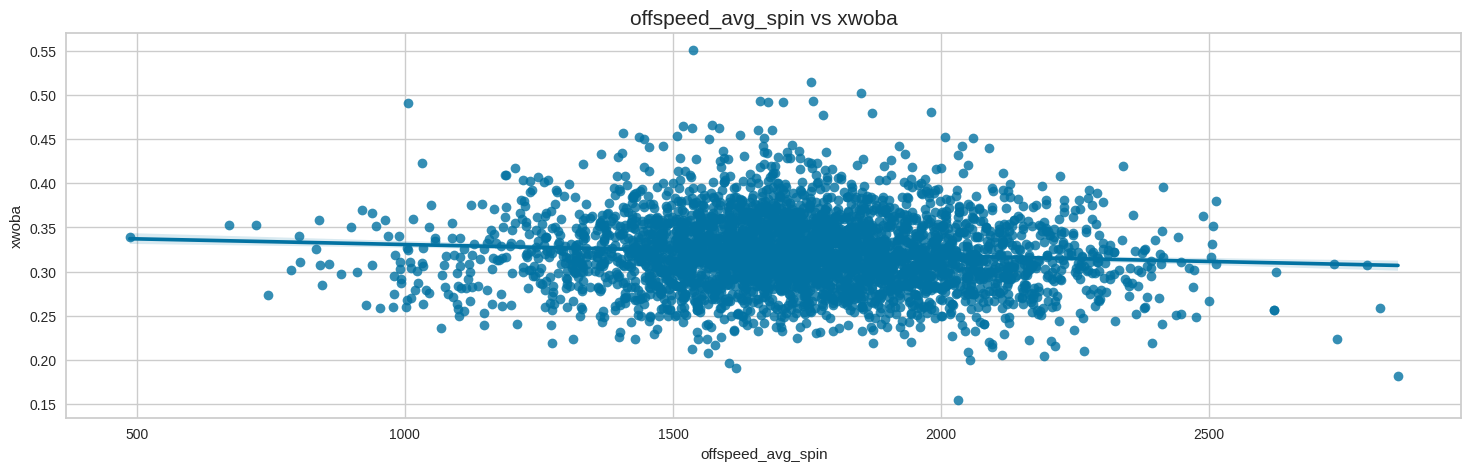

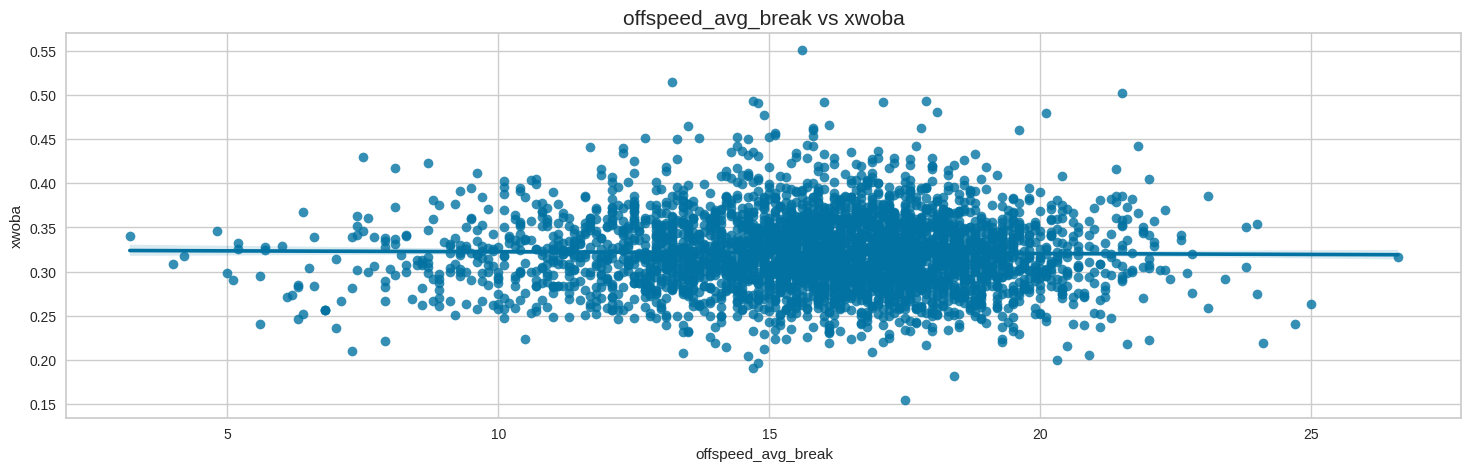

In [ ]:
for col in pitch_features:
  regplot(col)

위의 그래프에서 알게 된 점
* 실제로 구속이 빠를수록 예상 성적은 줄어드는 것을 볼 수 있다.
* 구속뿐만 아니라, 회전수도 성적에 영향을 많이 미치는 것을 알 수 있다.
* 의외로 변화구들의 변화정도에 따른 영향은 미미하다. 

## 새로운 피처 생성

그러나 평소 궁금했던 점이 한가지 더 있어서 피쳐를 추가해 보고자 한다.
체인지업같이 타이밍을 빼았는 공을 오프스피드 피치라고 하는데, 브레이킹볼처럼 큰 변화를 통해서 헛스윙을 유도하는 것이 아닌, 직구와 비슷한 궤적으로 가지만 타자의 바로 앞에서 갑자기 궤도를 바꾸며 헛스윙을 유도하는 구종들이다. 이러한 오프스피드 피치의 핵심은 패스트볼과의 구속 차이이다. 어느정도의 구속 차이가 있어야 타자의 타이밍을 빼았는다고 들었는데, 그렇다면 구속 차이가 클 수록 좋은 것인지 궁금하여 피쳐를 생성해 그래프를 그려보기로 한다.

In [ ]:
fastball_offspeed = df[df['throws_offspeed']==1]    # 오프스피드 피치를 던지는 선수들의 데이터만 불러온다.

In [ ]:
fastball_offspeed['fastball-offspeed'] = fastball_offspeed['fastball_avg_speed'] - fastball_offspeed['offspeed_avg_speed']  # 직구와 오프스피드의 구속 차이 피쳐 생성

<Axes: xlabel='fastball-offspeed', ylabel='xwoba'>

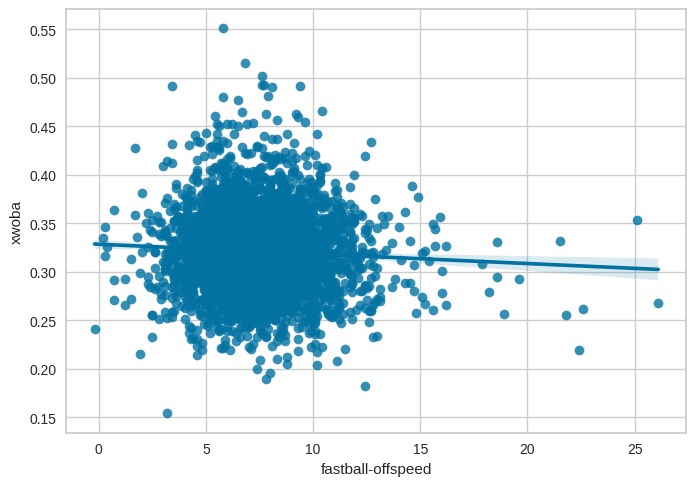

In [ ]:
sns.regplot(x='fastball-offspeed',y='xwoba',data=fastball_offspeed)

직구와 오프스피드 피치의 구속 차이가 성적에 영향을 미친다는 것을 확인 할 수 있다. 이에 따라, 직구와 오프스피드 피치의 구속 차이 컬럼을 추가한다. 

In [ ]:
df['fastball-offspeed'] = df['fastball_avg_speed'] - df['offspeed_avg_speed']
valid['fastball-offspeed'] = valid['fastball_avg_speed'] - valid['offspeed_avg_speed']
test['fastball-offspeed'] = test['fastball_avg_speed'] - test['offspeed_avg_speed']

## Correlation

In [ ]:
corr=df.corr()

In [ ]:
corr()              # 타겟인 xwoba와 피쳐들간의 상관관계가 꽤 있어보인다. 

,p_k_percent,p_bb_percent,xwoba,z_swing_percent,z_swing_miss_percent,oz_swing_percent,oz_swing_miss_percent,oz_contact_percent,out_zone_percent,iz_contact_percent,...,whiff_percent,fastball_avg_speed,fastball_avg_spin,fastball_avg_break,breaking_avg_speed,breaking_avg_spin,breaking_avg_break,offspeed_avg_speed,offspeed_avg_spin,offspeed_avg_break
p_k_percent,1.000000,0.006547,-0.632168,-0.114872,0.717554,0.276470,0.643365,-0.640165,-0.035577,-0.714167,...,0.819420,0.385069,0.378272,0.134312,0.056508,0.100998,0.026827,-0.170138,-0.157589,-0.178235
p_bb_percent,0.006547,1.000000,0.259142,-0.195292,0.118003,-0.464047,0.160578,-0.159951,0.400130,-0.114701,...,0.161030,0.204411,0.103306,0.037033,0.065280,0.074445,-0.012164,-0.095794,-0.104767,-0.110434
xwoba,-0.632168,0.259142,1.000000,0.066484,-0.443716,-0.406967,-0.349537,0.348467,0.128879,0.449525,...,-0.497766,-0.219693,-0.186630,-0.022689,-0.009424,-0.034808,-0.037908,0.125287,0.096892,0.119213
z_swing_percent,-0.114872,-0.195292,0.066484,1.000000,0.152367,0.120069,-0.094261,0.096252,-0.111283,-0.145815,...,-0.019905,0.059521,0.066404,0.047325,0.011083,-0.178920,-0.275756,0.053130,0.034265,0.054353
z_swing_miss_percent,0.717554,0.118003,-0.443716,0.152367,1.000000,0.156250,0.390146,-0.384271,-0.055448,-0.991527,...,0.818379,0.336376,0.379454,0.189849,0.016833,0.013630,-0.061549,-0.102090,-0.078945,-0.086759
oz_swing_percent,0.276470,-0.464047,-0.406967,0.120069,0.156250,1.000000,0.150033,-0.149365,0.140485,-0.162908,...,0.319424,0.000641,0.068182,0.001727,0.003965,-0.042892,-0.126739,-0.004416,0.007032,-0.008901
oz_swing_miss_percent,0.643365,0.160578,-0.349537,-0.094261,0.390146,0.150033,1.000000,-0.995176,0.139626,-0.386082,...,0.805902,0.385959,0.271178,-0.009697,0.100478,0.108352,-0.095305,-0.171557,-0.181594,-0.215559
oz_contact_percent,-0.640165,-0.159951,0.348467,0.096252,-0.384271,-0.149365,-0.995176,1.000000,-0.140343,0.383389,...,-0.799849,-0.381718,-0.266075,0.012216,-0.096796,-0.105275,0.095612,0.167627,0.176945,0.211938
out_zone_percent,-0.035577,0.400130,0.128879,-0.111283,-0.055448,0.140485,0.139626,-0.140343,1.000000,0.049439,...,0.198348,-0.077471,-0.020717,-0.075169,-0.003405,0.020467,-0.067036,0.027646,0.020634,0.003863
iz_contact_percent,-0.714167,-0.114701,0.449525,-0.145815,-0.991527,-0.162908,-0.386082,0.383389,0.049439,1.000000,...,-0.813364,-0.324186,-0.365763,-0.185805,-0.013879,-0.010588,0.060409,0.098289,0.074862,0.082112


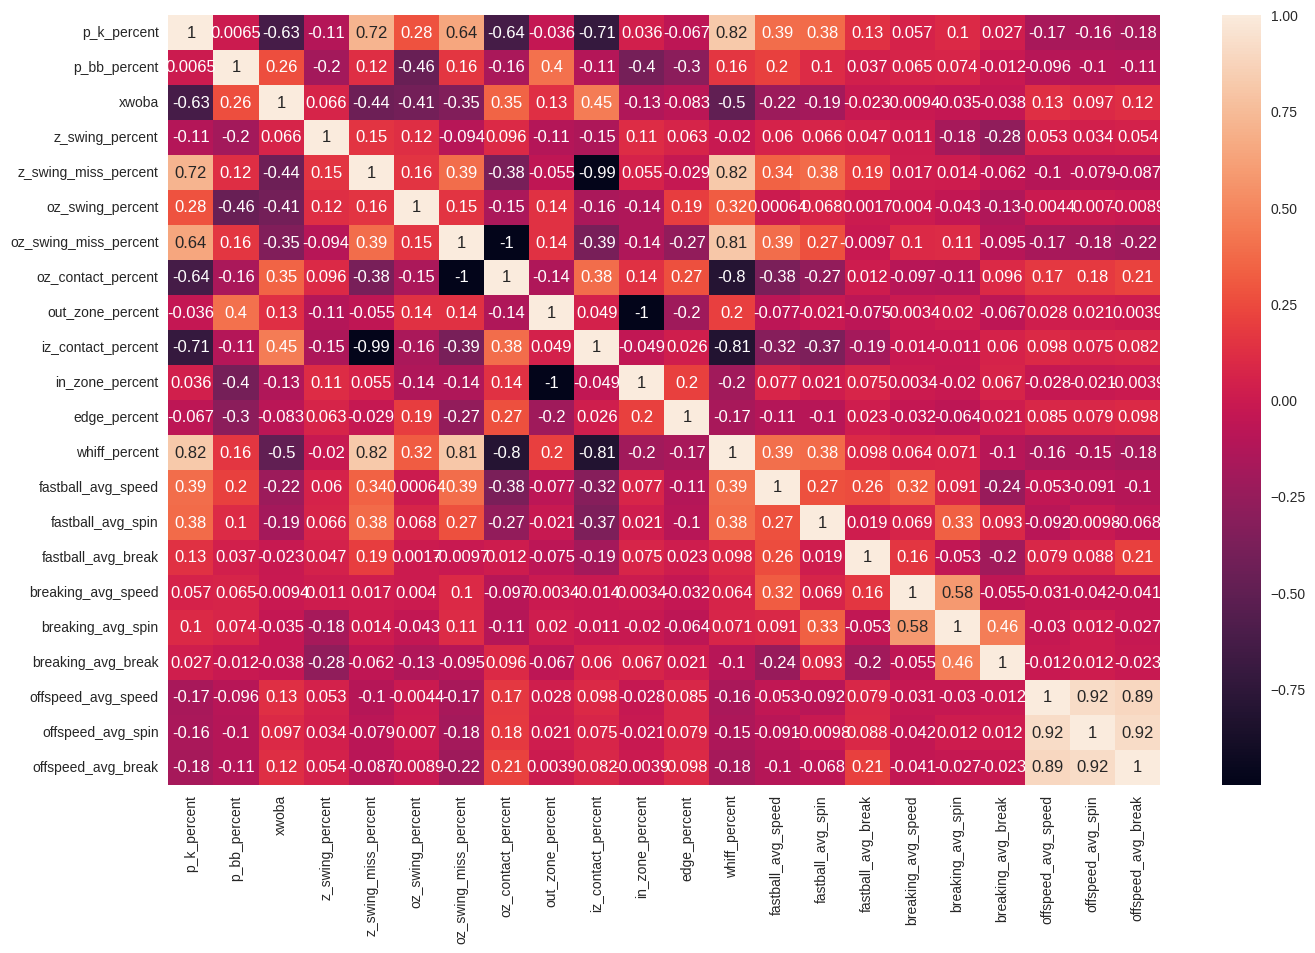

In [ ]:
import seaborn as sns
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(),annot=True)
plt.show()

## 분석과는 관련이 거의 없지만 궁금했던 점

이전에 투수가 던진 공의 회전수는 구속에 큰 영향을 미치지 않는다는 글을 읽은 적이 있다. 상식적으로 생각해보면, 공에 회전이 많이 걸릴수록 공이 더 빠르게 나아가지 않을까? 하는 생각이 들어 궁금하여 알아보고자 한다.

<Axes: xlabel='fastball_avg_spin', ylabel='fastball_avg_speed'>

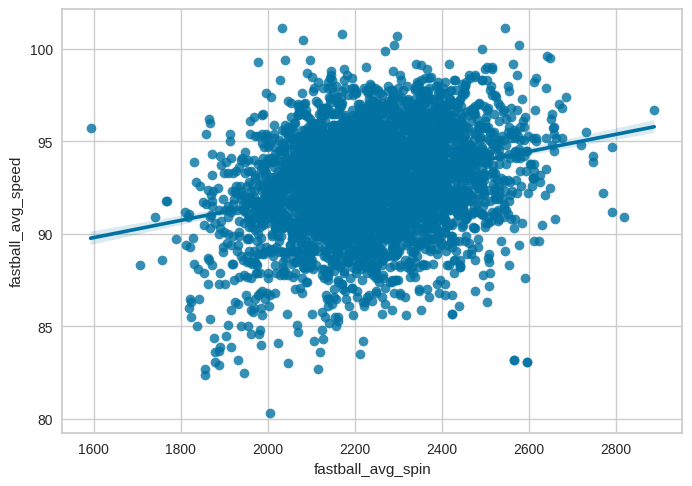

In [ ]:
sns.regplot(x='fastball_avg_spin',y='fastball_avg_speed',data=df)

<Axes: xlabel='breaking_avg_spin', ylabel='breaking_avg_speed'>

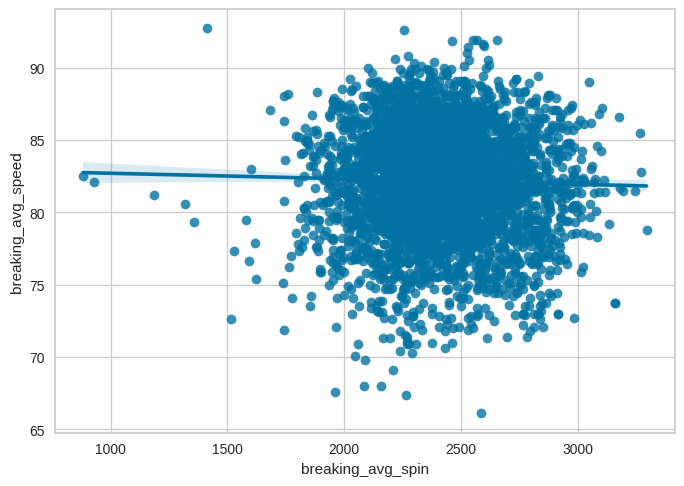

In [ ]:
sns.regplot(x='breaking_avg_spin',y='breaking_avg_speed',data=df[df['throws_breaking']==1])

<Axes: xlabel='offspeed_avg_spin', ylabel='offspeed_avg_speed'>

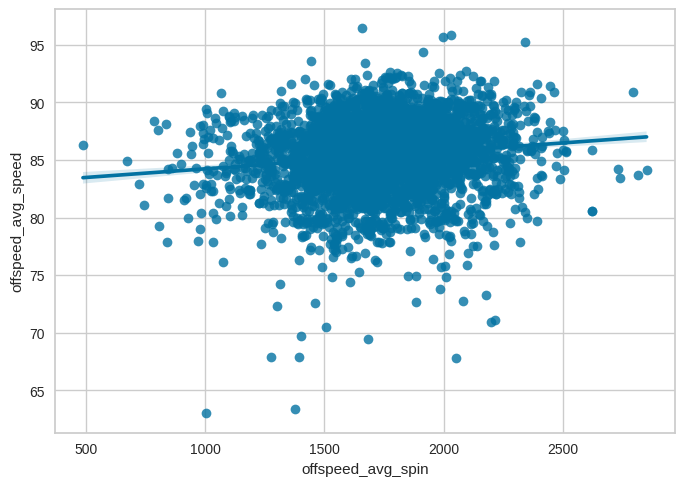

In [ ]:
sns.regplot(x='offspeed_avg_spin',y='offspeed_avg_speed',data=df[df['throws_offspeed']==1])

<Axes: xlabel='breaking_avg_spin', ylabel='breaking_avg_break'>

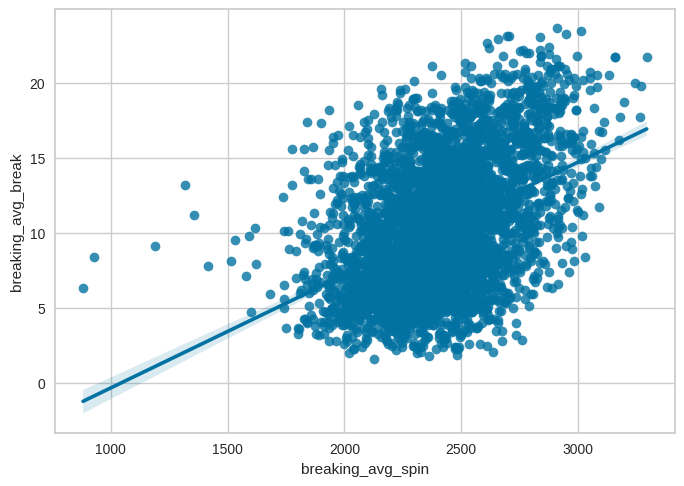

In [ ]:
sns.regplot(x='breaking_avg_spin',y='breaking_avg_break',data=df[df['throws_breaking']==1])

<Axes: xlabel='offspeed_avg_spin', ylabel='offspeed_avg_break'>

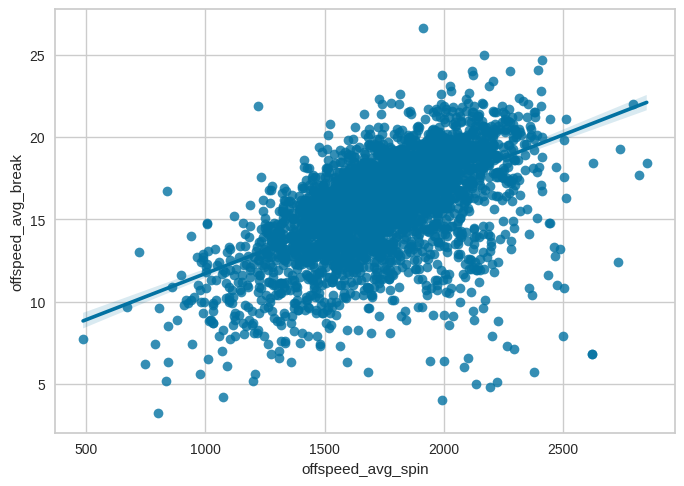

In [ ]:
sns.regplot(x='offspeed_avg_spin',y='offspeed_avg_break',data=df[df['throws_offspeed']==1])

다행이도 상식이 통했다. 패스트볼과 오프스피드 같은 경우, 회전을 정방향으로 주어 던지므로 회전수가 많을수록 구속도 증가하는 것을 볼 수 있다.
반대로, 브레이킹볼은 회전을 역방향으로 준다. 따라서 회전수가 많을수록 구속은 줄어들지만, 대신 변화가 커진다.